In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
from hydra.utils import instantiate
from hydra import initialize, compose
import hydra

from data.dataManager import DataManager
from model.modelCreator import ModelCreator
from omegaconf import OmegaConf
from scripts.run import run

[20:00:12.529] INFO   CaloQVAE                                          Willkommen!
[20:00:12.531] INFO   CaloQVAE                                          Loading configuration.
[20:00:14.743] INFO   CaloQuVAE                                         Loading configuration.


In [2]:
hydra.core.global_hydra.GlobalHydra.instance().clear()
initialize(version_base=None, config_path="config")
config=compose(config_name="config.yaml")

In [9]:

devids = ["cuda:{0}".format(x) for x in list(config.gpu_list)]
dev = torch.device(devids[0])

In [10]:
model, dataMgr = run(config)

[18:46:13.828] INFO   data.dataManager                                  Keys: ['incident_energies', 'showers']
[18:46:16.725] INFO   data.dataManager                                  dict_keys(['incident_energies', 'showers'])
[18:46:16.727] INFO   data.dataManager                                  <torch.utils.data.dataloader.DataLoader object at 0x7f3f021f9130>: 101816 events, 796 batches
[18:46:16.727] INFO   data.dataManager                                  <torch.utils.data.dataloader.DataLoader object at 0x7f3fa2e2c470>: 12728 events, 13 batches
[18:46:16.728] INFO   data.dataManager                                  <torch.utils.data.dataloader.DataLoader object at 0x7f3fa2d51220>: 12727 events, 13 batches
[18:46:16.728] INFO   model.modelCreator                                ::Creating Model
[18:46:16.929] INFO   dwave.cloud.client.base                           Fetching definitions of all available solvers
[18:46:16.966] INFO   dwave.cloud.client.base                           

encoder._networks.0.seq1.0.conv.weight True
encoder._networks.0.seq1.0.conv.bias True
encoder._networks.0.seq1.1.weight True
encoder._networks.0.seq1.1.bias True
encoder._networks.0.seq1.2.weight True
encoder._networks.0.seq1.3.conv.weight True
encoder._networks.0.seq1.3.conv.bias True
encoder._networks.0.seq1.4.weight True
encoder._networks.0.seq1.4.bias True
encoder._networks.0.seq1.5.weight True
encoder._networks.0.seq2.0.conv.weight True
encoder._networks.0.seq2.0.conv.bias True
encoder._networks.0.seq2.1.weight True
encoder._networks.0.seq2.1.bias True
encoder._networks.0.seq2.2.weight True
encoder._networks.0.seq2.3.conv.weight True
encoder._networks.0.seq2.3.conv.bias True
encoder._networks.0.seq2.4.weight True
encoder._networks.1.seq1.0.conv.weight True
encoder._networks.1.seq1.0.conv.bias True
encoder._networks.1.seq1.1.weight True
encoder._networks.1.seq1.1.bias True
encoder._networks.1.seq1.2.weight True
encoder._networks.1.seq1.3.conv.weight True
encoder._networks.1.seq1.3.

[18:46:18.602] INFO   scripts.run                                       Model NOT being watched by wandb


In [11]:
x = next(iter(dataMgr.train_loader))
# next(iter(dataMgr.train_loader))

In [12]:
with torch.no_grad():
    enc_data = model.encoder(x[0].to(dev, dtype=torch.float32), x[1].to(dev, dtype=torch.float32))

In [18]:
len(enc_data)
len(enc_data[1])

3

In [6]:
with torch.no_grad():
    enc_data = model((x[0].to(dev, dtype=torch.float32), x[1].to(dev, dtype=torch.float32)))

In [7]:
with torch.no_grad():
    l = model.loss(x[0].to(dev, dtype=torch.float32), enc_data)

In [8]:
l

{'ae_loss': tensor(inf, device='cuda:2'),
 'kl_loss': 0,
 'hit_loss': tensor(2765.2200, device='cuda:2'),
 'entropy': 0,
 'pos_energy': 0,
 'neg_energy': 0}

In [1]:
###############

In [22]:
from model.rbm.zephyr import ZephyrRBM

In [23]:
config.rbm.latent_nodes_per_p=302
self = ZephyrRBM(config)

[19:30:44.060] INFO   dwave.cloud.client.base                           Fetching definitions of all available solvers


[19:30:44.245] INFO   dwave.cloud.client.base                           Received solver data for 7 solver(s).
[19:30:44.622] INFO   dwave.cloud.client.base                           Adding solver StructuredSolver(id='Advantage_system4.1')
[19:30:44.684] INFO   dwave.cloud.client.base                           Adding solver StructuredSolver(id='Advantage_system6.4')
[19:30:44.760] INFO   dwave.cloud.client.base                           Adding solver StructuredSolver(id='Advantage2_system1.3')


In [10]:
binwidth = 1.0
data = {}
for key in self.weight_dict.keys():
    # data[key] = engine.model.prior.weight_dict[key].sign().abs().sum(dim=0).detach().cpu().numpy()
    data[key] = self._weight_mask_dict[key].abs().sum(dim=0).cpu().numpy()
    
    


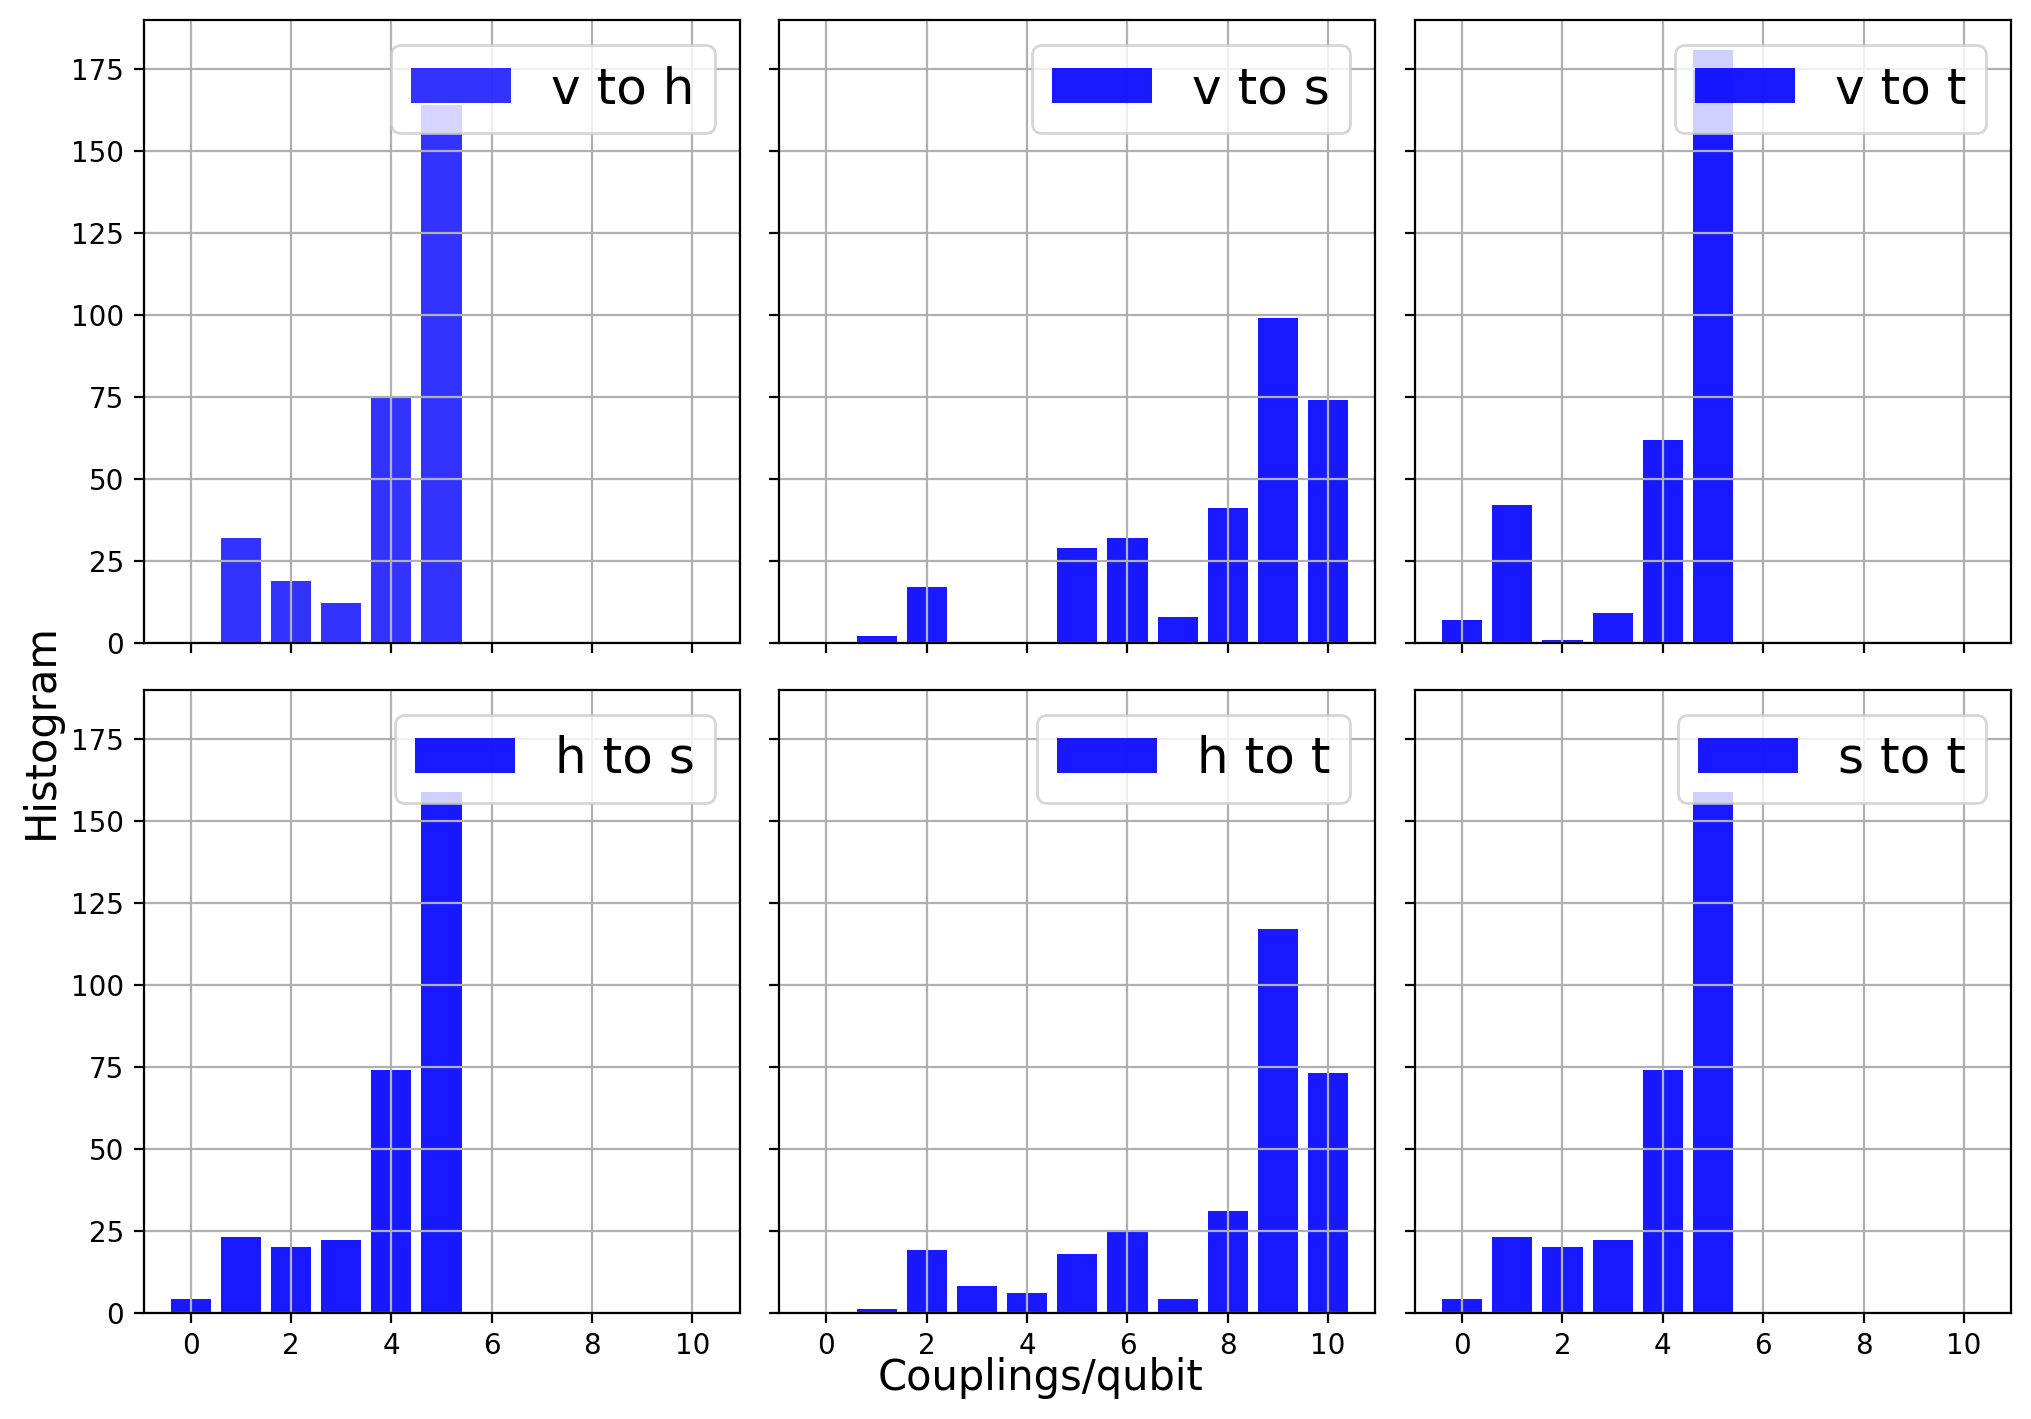

In [11]:
# Create 2x2 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(10, 7), sharey=True, sharex=True, tight_layout=True)  # 2x2 grid, figure size 10x10
fig.text(0.5, 0.0, 'Couplings/qubit', ha='center', fontsize=15)
fig.text(0.0, 0.4, 'Histogram', rotation=90, ha='center', fontsize=15)

# Plot data on each subplot
labels, counts = np.unique(data['01'], return_counts=True)
axs[0,0].bar(labels, counts, align='center', color="b", alpha=0.8)
# axs[0, 0].hist(data['01'], bins=np.arange(min(data['01']), max(data['01']) + binwidth, binwidth), histtype='stepfilled', linewidth=2.5, color="b", alpha=0.7, align='center')
axs[0,0].grid("True")
axs[0,0].legend(["v to h"], fontsize=18)

labels, counts = np.unique(data['02'], return_counts=True)
axs[0,1].bar(labels, counts, align='center', color="b", alpha=0.9)
axs[0,1].grid("True")
axs[0,1].legend(["v to s"], fontsize=18)

labels, counts = np.unique(data['03'], return_counts=True)
axs[0,2].bar(labels, counts, align='center', color="b", alpha=0.9)
axs[0,2].grid("True")
axs[0,2].legend(["v to t"], fontsize=18)

labels, counts = np.unique(data['12'], return_counts=True)
axs[1,0].bar(labels, counts, align='center', color="b", alpha=0.9)
axs[1,0].grid("True")
axs[1,0].legend(["h to s"], fontsize=18)

labels, counts = np.unique(data['13'], return_counts=True)
axs[1,1].bar(labels, counts, align='center', color="b", alpha=0.9)
axs[1,1].grid("True")
axs[1,1].legend(["h to t"], fontsize=18)

labels, counts = np.unique(data['12'], return_counts=True)
axs[1,2].bar(labels, counts, align='center', color="b", alpha=0.9)
axs[1,2].grid("True")
axs[1,2].legend(["s to t"], fontsize=18)

# plt.savefig(f'/home/javier/Projects/CaloQVAE/figs/weights_plot_zephyr.png', bbox_inches="tight")

plt.show()

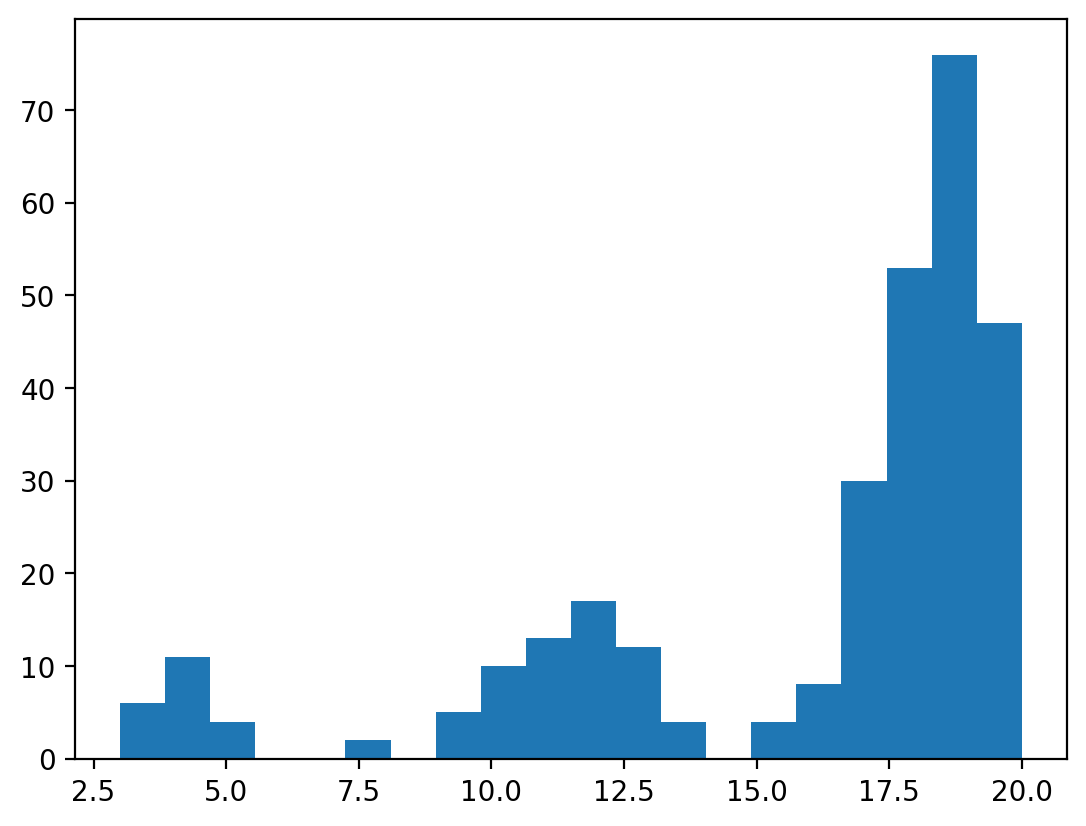

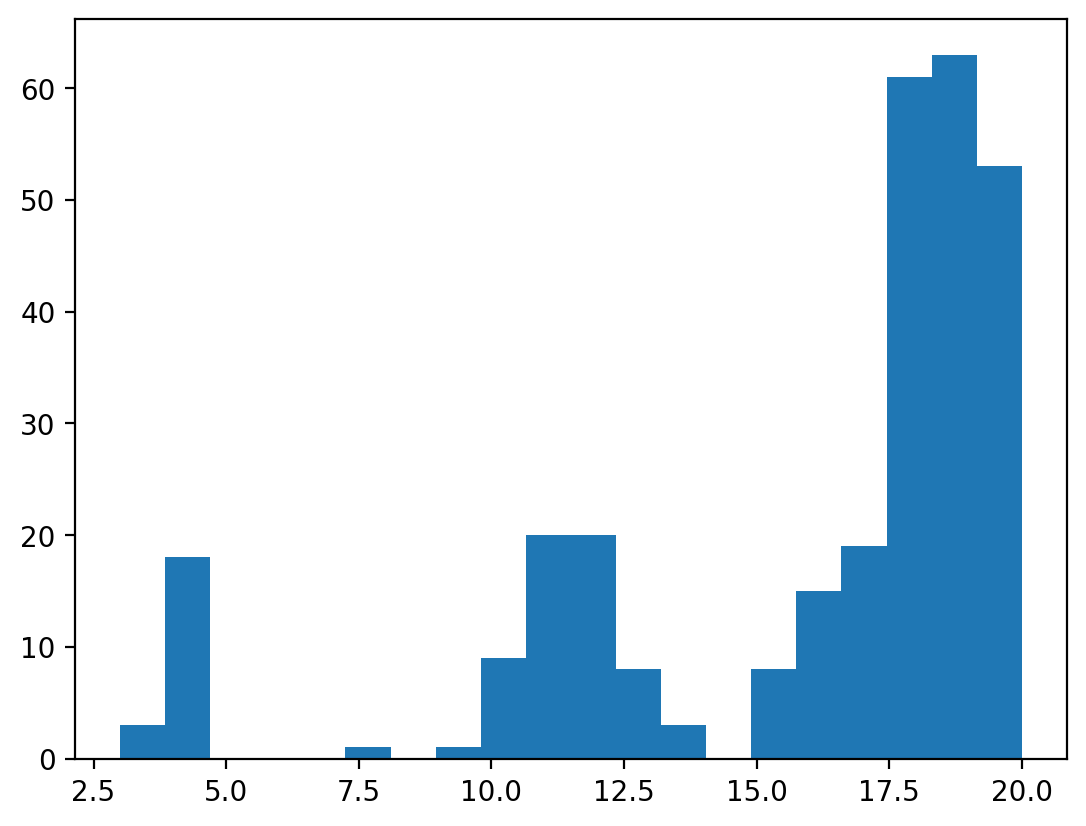

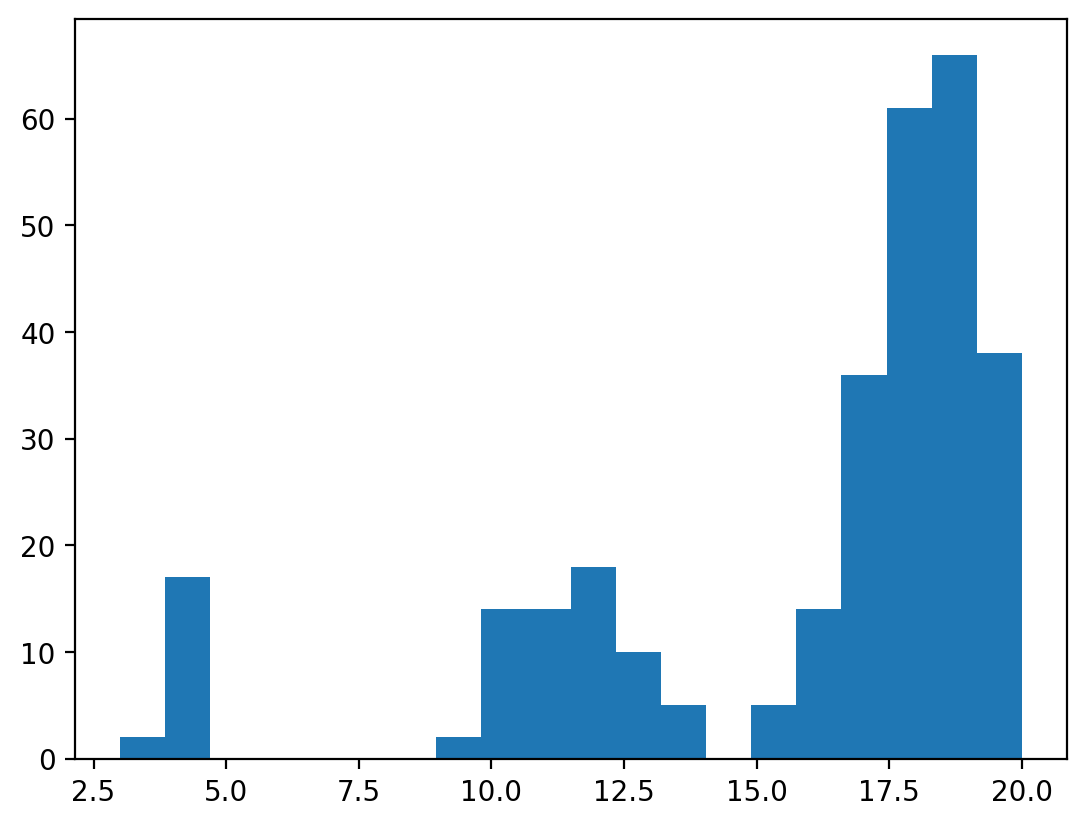

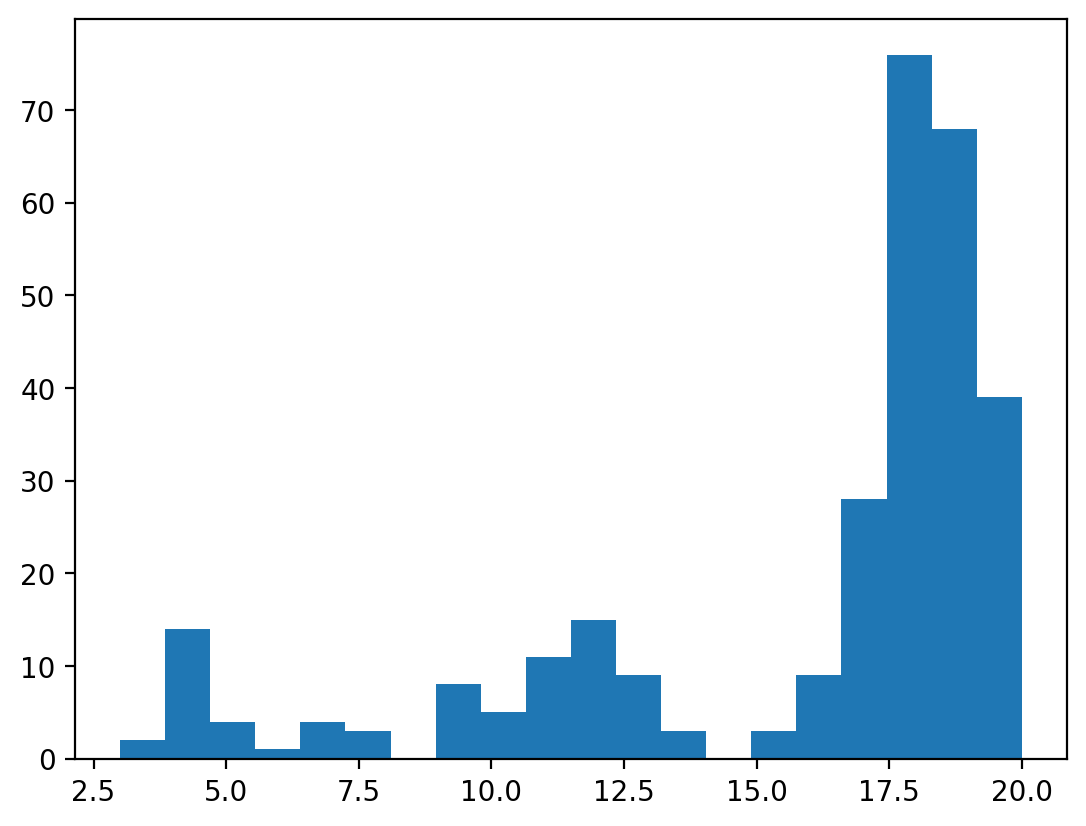

In [18]:
plt.hist(torch.cat((zph._weight_mask_dict['01'],zph._weight_mask_dict['02'],zph._weight_mask_dict['03']),1).sum(dim=1).numpy(), bins=20)
plt.show()
plt.hist(torch.cat((zph._weight_mask_dict['01'].transpose(1,0),zph._weight_mask_dict['12'],zph._weight_mask_dict['13']),1).sum(dim=1), bins=20)
plt.show()
plt.hist(torch.cat((zph._weight_mask_dict['02'].transpose(1,0),zph._weight_mask_dict['12'].transpose(1,0),zph._weight_mask_dict['23']),1).sum(dim=1), bins=20)
plt.show()
plt.hist(torch.cat((zph._weight_mask_dict['03'].transpose(1,0),zph._weight_mask_dict['13'].transpose(1,0),zph._weight_mask_dict['23'].transpose(1,0)),1).sum(dim=1), bins=20)
plt.show()

In [3]:
##############

In [3]:
from model.rbm.rbm import RBM

In [4]:
self = RBM(config)

[18:42:11.589] INFO   dwave.cloud.client.base                           Fetching definitions of all available solvers
[18:42:11.779] INFO   dwave.cloud.client.base                           Received solver data for 7 solver(s).
[18:42:12.053] INFO   dwave.cloud.client.base                           Adding solver StructuredSolver(id='Advantage_system4.1')
[18:42:12.115] INFO   dwave.cloud.client.base                           Adding solver StructuredSolver(id='Advantage_system6.4')
[18:42:12.182] INFO   dwave.cloud.client.base                           Adding solver StructuredSolver(id='Advantage2_system1.3')


In [5]:
p0 = torch.bernoulli(torch.rand(100,config.rbm.latent_nodes_per_p))
p1 = torch.bernoulli(torch.rand(100,config.rbm.latent_nodes_per_p))
p2 = torch.bernoulli(torch.rand(100,config.rbm.latent_nodes_per_p))
p3 = torch.bernoulli(torch.rand(100,config.rbm.latent_nodes_per_p))

In [8]:
# self.block_gibbs_sampling(p0, p1, p2, p3)

In [21]:
len(dataMgr.train_loader)

796

In [3]:
engine=instantiate(config.engine, config)
# config.engine

In [6]:
engine.model